In [2]:
%reload_ext autoreload
%autoreload 2

!pip install dowhy


In [3]:
# Config dict to set the logging level
import logging.config
DEFAULT_LOGGING = {
     'version': 1,
     'disable_existing_loggers': False,
     'loggers': {
          '':   { 
             'level': 'INFO',
              },
     }
    }
logging.config.dictConfig (DEFAULT_LOGGING)
# Disabling warnings output
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings. filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
#!pip install dowhy
import dowhy
import pandas as pd
import numpy as пр
import matplotlib.pyplot as plt


## Data Description

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Feature Engineering

Lets create some new and meaningful features so as to reduce the dimensionality of the dataset. 

(Tạo một số tính năng mới và có ý nghĩa để giảm chiều tính của tập dữ liệu.)

- Total + stays_in_week_nights
- Guests = adults + children + babies
- Differentroom_assigned = 1 if reserved_room_type & assigned_room_type are different, 0 otherwise.


In [7]:
#Total stay in nights
dataset['total_stay'] = dataset['stays_in_week_nights'] + dataset['stays_in_weekend_nights']
# Total number of guests
dataset['guests'] = dataset['adults'] + dataset['children'] + dataset['babies']
# Creating the different_rocm_assigned feature
dataset['different_room_assigned'] = 0 
slice_indices = dataset['reserved_room_type']!=dataset['assigned_room_type']
dataset.loc[slice_indices,'different_room_assigned'] = 1
# Deleting older features
dataset = dataset.drop(['stays_in_week_nights', 'stays_in_weekend_nights', 'adults', 'children', 'babies'
                        , 'reserved_room_type', 'assigned_room_type'],axis=1)
dataset.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay', 'guests',
       'different_room_assigned'],
      dtype='object')

We also remove other columns that either contain NULL values or have too many unique values (e.g., agent ID). We also impute missing values of the country column with the most frequent country. We remove distribution_channel since it has a high overlap with market_segment.

Xóa các cột khác chứa giá trị NULL hoặc có quá nhiều giá trị duy nhất (ví dụ: ID tác nhân). Chúng tôi cũng gán các giá trị bị thiếu của cột quốc gia với quốc gia thường xuyên nhất. Chúng tôi xóa distribution_channel vì nó có có sự trùng lặp cao với market_segment.

In [8]:
dataset.isnull().sum() # Country, Agent, Company contain 488,16340, 112593 missing entries
# Replacing missing countries with most fregently occuring countries
dataset['country'] = dataset['country'].fillna(dataset['country'].mode()[0]) 


In [9]:
dataset = dataset.drop(['reservation_status', 'reservation_status_date', 'arrival_date_day_of_month'],axis=1)
dataset = dataset.drop(['arrival_date_year'],axis=1)
dataset = dataset.drop(['distribution_channel'],axis=1)


In [10]:
# Replacing 1 by True and e by False for the experiment and outcome variables
dataset['different_room_assigned'] = dataset['different_room_assigned'].replace(1, True)
dataset['different_room_assigned'] = dataset['different_room_assigned'].replace(0, False)
dataset['is_canceled'] = dataset['is_canceled'].replace(1,True)
dataset['is_canceled']= dataset['is_canceled'].replace(0,False)
dataset.dropna(inplace=True)
print(dataset.columns)
dataset.iloc[:, 5:20].head(100)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'meal', 'country', 'market_segment',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_stay', 'guests', 'different_room_assigned'],
      dtype='object')


,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
2392,BB,PRT,Online TA,0,0,0,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1
2697,BB,AUT,Corporate,0,0,0,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0
2867,BB,ESP,Corporate,0,0,0,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0
2877,BB,PRT,Corporate,0,0,0,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0
2878,BB,ITA,Corporate,0,0,0,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18225,BB,PRT,Corporate,0,0,0,2,No Deposit,185.0,281.0,0,Transient-Party,49.2,0,0
18227,BB,AUT,Corporate,0,0,0,2,No Deposit,185.0,281.0,0,Transient-Party,58.2,1,0
18228,BB,AUT,Corporate,0,0,0,2,No Deposit,185.0,281.0,0,Transient-Party,36.0,0,0
18233,BB,AUT,Corporate,0,0,0,2,No Deposit,185.0,281.0,0,Transient-Party,36.0,0,0


In [11]:
dataset = dataset[dataset.deposit_type=="No Deposit"]
dataset.groupby(['deposit_type','is_canceled']).count()


hotel  lead_time  arrival_date_month  \
deposit_type is_canceled                                         
No Deposit   False          196        196                 196   
             True            17         17                  17   

                          arrival_date_week_number  meal  country  \
deposit_type is_canceled                                            
No Deposit   False                             196   196      196   
             True                               17    17       17   

                          market_segment  is_repeated_guest  \
deposit_type is_canceled                                      
No Deposit   False                   196                196   
             True                     17                 17   

                          previous_cancellations  \
deposit_type is_canceled                           
No Deposit   False                           196   
             True                             17   

                          previous_bookings_not_canceled  ...  agent  company  \
deposit_type is_canceled                                  ...                   
No Deposit   False                                   196  ...    196      196   
             True                                     17  ...     17       17   

                          days_in_waiting_list  customer_type  adr  \
deposit_type is_canceled                                             
No Deposit   False                         196            196  196   
             True                           17             17   17   

                          required_car_parking_spaces  \
deposit_type is_canceled                                
No Deposit   False                                196   
             True                                  17   

                          total_of_special_requests  total_stay  guests  \
deposit_type is_canceled                                                  
No Deposit   False                              196         196     196   
             True                                17          17      17   

                          different_room_assigned  
deposit_type is_canceled                           
No Deposit   False                            196  
             True                              17  

[2 rows x 21 columns]

In [12]:
dataset_copy = dataset.copy(deep=True)

## Calculating Expected Counts
Since the number of number of cancellations and the number of times a different room was assigned is heavily imbalanced, we first choose
1000 observations at random to see that in how many cases do the variables; is_cancelled'& 'different_room_assigned attain the same values.
This whole process is then repeated 10000 times and the expected count turns out to be near 50% (i.e. the probability of these two variables attaining the same value at random). So statistically speaking, we have no definite conclusion at this stage. Thus assigning rooms different to what a customer had reserved during his

Tính số lượng dự kiến Vì số lần hủy và số lần một phòng khác được chỉ định rất mất cân bằng, trước tiên chúng tôi chọn ngẫu nhiên 1000 quan sát để xem trong bao nhiêu trường hợp các biến; is_cancelled'& 'other_room_signed đều đạt được kết quả như nhau Toàn bộ quá trình này sau đó được lặp lại 10000 lần và số lượng dự kiến ​​​​là gần 50% (tức là xác suất hai biến này đạt được cùng một giá trị một cách ngẫu nhiên). Do đó, việc chỉ định phòng khác với phòng mà khách hàng đã đặt trong thời gian

In [13]:
counts_sum=0
for i in range(1,10000):
        counts_i = 0
        rdf = dataset.sample(1000, replace=True)
        counts_i = rdf[rdf["is_canceled"]== rdf["different_room_assigned"]].shape[0]
        counts_sum+= counts_i
counts_sum/10000

We now consider the scenario when there were no booking changes and recalculate the expected count.


In [14]:
# Expected Count when there are no booking changes
counts_sum=0
for i in range(1,10000):
        counts_i = 0
        rdf = dataset[dataset["booking_changes"]==0].sample(1000, replace=True)
        counts_i = rdf[rdf["is_canceled"]== rdf["different_room_assigned"]].shape[0]
        counts_sum+= counts_i
counts_sum/10000

In the 2nd case, we take the scenario when there were booking changes(>0) and recalculate the expected count.

Trong trường hợp thứ 2, chúng tôi lấy tình huống khi có thay đổi đặt chỗ (>0) và tính toán lại số lượng dự kiến.

In [15]:
# Expected Count when there are booking changes = 66.4%
counts_sum=0
for i in range(1,10000):
        counts_i = 0
        rdf = dataset[dataset["booking_changes"]>0].sample(1000, replace=True)
        counts_i = rdf[rdf["is_canceled"]== rdf["different_room_assigned"]].shape[0]
        counts_sum+= counts_i
counts_sum/10000

There is definitely some change happening when the number of booking changes are non-zero. So it gives us a hint that Booking Changes may be affecting room cancellation.
But is Booking Changes the only confounding variable? What if there were some unobserved confounders, regarding which we have no information(feature) present in our dataset. Would we still be able to make the same claims as before?

Chắc chắn có một số thay đổi xảy ra khi số lần thay đổi đặt phòng khác 0. Vì vậy, nó cho chúng ta gợi ý rằng Thay đổi đặt phòng có thể ảnh hưởng đến việc hủy phòng. Nhưng liệu Thay đổi đặt phòng có phải là biến số gây nhiễu duy nhất không? Điều gì sẽ xảy ra nếu có một số yếu tố gây nhiễu không được quan sát, liên quan đến mà chúng tôi không có thông tin (tính năng) nào có trong tập dữ liệu của mình. Liệu chúng tôi có thể đưa ra các tuyên bố tương tự như trước đây không?

## Using DoWhy to estimate the causal effect


## Step-1. Create a Causal Graph
Represent your prior knowledge about the predictive modelling problem as a CI graph using assumptions. Don't worry, you need not specify the full graph at this stage. Even a partial graph would be enough and the rest can be figured out by DoWhy :-)
Here are a list of assumptions that have then been translated into a Causal Diagram:-

      - Market Segment has 2 levels, "TA" refers to the "Travel Agents" and "TO" means "Tour Operators" so it should affect the Lead Time (which is simply the number of days between booking and arrival).
      
      - Country would also play a role in deciding whether a person books early or not (hence more Lead Time) and what type of Meal a person would prefer.
      
      - Lead Time would definitely affected the number of Days in Waitlist (There are lesser chances of finding a reservation if you're booking late).
      
      - The number of Days in Waitlist, the Total Stay in nights and the number of Guests might affect whether the booking is cancelled or retained.
      
      - Previous Booking Retentions would affect whether a customer is a or not. Additionally, both of these variables would affect whether the booking get cancelled or not (Ex- A customer who has retained his past 5 bookings in the past has a higher chance of retaining this one also. Similarly a person who has been cancelling this booking has a higher chance of repeating the same).
      
      - Booking Changes would affect whether the customer is assigned a
      
      - Finally, the number of Booking Changes being the only variable affecting Treatment and Outcome is highly unlikely and its possible that there might be some Unobsevered Confounders, regarding which we have по information being captured in our data.

Trình bày kiến thức trước đây của bạn về vấn đề lập mô hình dự đoán dưới dạng biểu đồ CI bằng cách sử dụng các giả định. Đừng lo lắng, bạn không cần chỉ định biểu đồ đầy đủ ở giai đoạn này. Ngay cả một biểu đồ một phần cũng đủ và phần còn lại có thể được Do Why tìm ra ;

Dưới đây là danh sách các giả định sau đó đã được chuyển thành Sơ đồ nhân quả: 
Phân khúc thị trường có 2 cấp độ, “TA” dùng để chỉ “Đại lý du lịch” và “TO” có nghĩa là “Nhà điều hành tour” nên nó sẽ ảnh hưởng đến Thời gian thực hiện (đơn giản là số ngày từ khi đặt chỗ đến khi đến).

Quốc gia cũng sẽ đóng vai trò quyết định xem một người có đặt chỗ sớm hay không (do đó có nhiều Thời gian thực hiện hơn) và loại Bữa ăn mà một người sẽ thích hơn.

Thời gian thực hiện chắc chắn sẽ ảnh hưởng đến số Ngày trong Danh sách chờ (Có ít cơ hội tìm được đặt chỗ hơn nếu bạn đặt chỗ muộn). Ngoài ra, Thời gian thực hiện cao hơn cũng có thể dẫn đến việc Hủy bỏ.
Số Ngày trong Danh sách chờ, Tổng số đêm lưu trú và số lượng Khách có thể ảnh hưởng đến việc đặt phòng bị hủy hay được giữ lại.

Tỷ lệ giữ chân đặt phòng trước đó sẽ ảnh hưởng đến việc khách hàng có phải là khách hàng hay không. Ngoài ra, cả hai biến này sẽ ảnh hưởng đến việc lượt đặt phòng có bị hủy hay không (Ví dụ- Một khách hàng đã giữ lại 5 lượt đặt phòng trước đây của mình có cơ hội giữ lại điều này cao hơn một cái nữa. Tương tự, một người đã hủy đặt chỗ này có cơ hội lặp lại điều tương tự cao hơn).

Thay đổi đặt phòng sẽ ảnh hưởng đến việc khách hàng có được chỉ định phòng khác hay không, điều này cũng có thể dẫn đến việc hủy đặt phòng.

Cuối cùng, số lượng Thay đổi đặt chỗ là biến số duy nhất ảnh hưởng đến Điều trị và Kết quả rất khó xảy ra và có thể có một số Yếu tố gây nhiễu không được quan sát mà chúng tôi không có thông tin nào được ghi lại trong dữ liệu của mình.



In [16]:
!pip install pygraphviz

In [17]:
import pygraphviz

In [18]:
# import pygraphviz
causal_graph = """digraph {
different_room_assigned[label="Different Room Assigned"];
is_canceled[label="Booking Cancelled"];
booking_changes[label="Booking Changes"];
previous_bookings_not_canceled[label="Previous Booking Retentions"];
days_in_waiting_list[label="Days in Waitlist"];
lead_time[label="Lead Time"];
market_segment[label="Market Segment"];
country[label="Country"];
U[label="Unobserved Confounders",observed="no"];
is_repeated_guest;
total_stay;
guests;
meal;
hotel;
U->{different_room_assigned, required_car_parking_spaces, guests, total_stay, total_of_special_requests};
market_segment -> lead_time;
lead_time->is_canceled; country -> lead_time;
different_room_assigned -> is_canceled;
country -> meal;
lead_time -> days_in_waiting_list;
days_in_waiting_list ->{is_canceled, different_room_assigned};
previous_bookings_not_canceled -> is_canceled;
previous_bookings_not_canceled -> is_repeated_guest;
is_repeated_guest -> {different_room_assigned, is_canceled};
total_stay -> is_canceled;
guests -> is_canceled;
booking_changes -> different_room_assigned; booking_changes -> is_canceled;
hotel -> {different_room_assigned, is_canceled};
required_car_parking_spaces -> is_canceled;
total_of_special_requests -> {booking_changes, is_canceled};
country->{hotel, required_car_parking_spaces, total_of_special_requests};
market_segment->{hotel, required_car_parking_spaces, total_of_special_requests};
}"""

Here the Treatment is assigning the same type of room reserved by the customer during Booking. Outcome would be whether the booking was cancelled or not. Common Causes represent the variables that according to us have a causal affect on both Outcome and Treatment. As per our causal assumptions, the 2 variables satisfying this criteria are Booking Changes and the Unobserved Confounders. So if we are not specifying the graph explicitly (Not Recommended!), one can also provide these as parameters in the function mentioned below.

To aid in identification of causal effect, we remove the unobserved confounder node from the graph. (To check, you can use the original graph and run the following code. The identify_effect method will find that the effect cannot be identified.)


Ở đây, Phương pháp xử lý(treatment) đang chỉ định cùng một loại phòng cho khách hàng trong quá trình đặt phòng. Kết quả sẽ là liệu đặt phòng có bị hủy hay không? Nguyên nhân chung thể hiện các biến số mà theo chúng tôi có ảnh hưởng nhân quả đến cả Kết quả(outcome) và Phương pháp xử lý(treatment). Theo chúng tôi giả định nhân quả, 2 biến thỏa mãn tiêu chí này là Thay đổi đặt chỗ và Yếu tố gây nhiễu không được quan sát. Vì vậy, nếu chúng ta không chỉ định biểu đồ một cách rõ ràng (Không được đề xuất!), thì người ta cũng có thể cung cấp những biến này dưới dạng tham số trong hàm được đề cập bên dưới.

Để hỗ trợ xác định tác động nhân quả, chúng tôi loại bỏ nút gây nhiễu không quan sát được khỏi biểu đồ. (Để kiểm tra, bạn có thể sử dụng biểu đồ gốc và chạy đoạn mã sau. Phương thức detect_effect sẽ thấy rằng không thể xác định được hiệu ứng.)


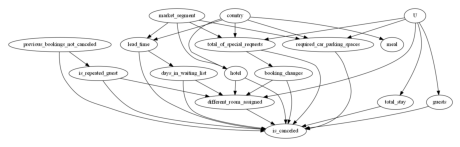

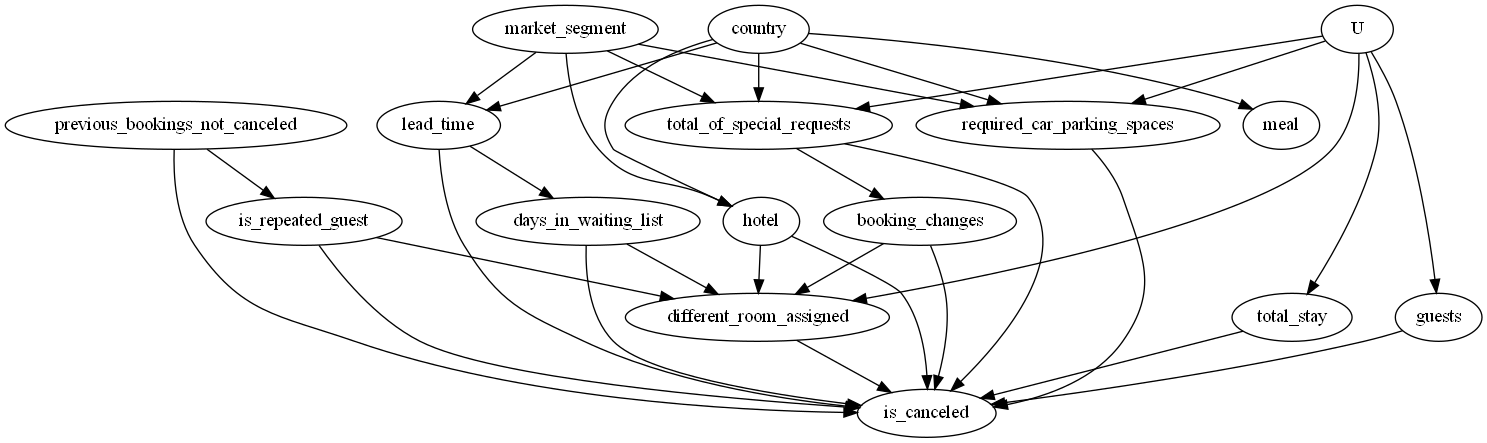

In [19]:
model = dowhy.CausalModel(
        data = dataset,
        graph=causal_graph.replace("\n", " "),
        treatment="different_room_assigned",
        outcome= 'is_canceled')
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))


## Step-2. Identify the Causal Effect
We say that Treatment causes Outcome if changing Treatment leads to a change in Outcome keeping everything else constant. Thus in this step, by using properties of the causal graph, we identify the causal effect to be estimated

Chúng ta nói rằng Phương pháp điều trị(Treatment) gây ra Kết quả nếu việc thay đổi Phương pháp điều trị(Treatment) dẫn đến thay đổi về Kết quả, giữ cho mọi thứ khác không đổi. Vì vậy, trong bước này, bằng cách sử dụng các thuộc tính của biểu đồ nhân quả, chúng ta xác định được tác động nhân quả được ước tính


In [20]:
#Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
──────────────────────────(E[is_canceled|total_stay,required_car_parking_space
d[different_room_assigned]                                                    

                                                                              
s,is_repeated_guest,days_in_waiting_list,hotel,booking_changes,guests,total_of
                                                                              

                             
_special_requests,lead_time])
                             
Estimand assumption 1, Unconfoundedness: If U→{different_room_assigned} and U→is_canceled then P(is_canceled|different_room_assigned,total_stay,required_car_parking_spaces,is_repeated_guest,days_in_waiting_list,hotel,booking_changes,guests,total_of_special_requests,lead_time,U) = P(is_canceled|different_room_assigned,total_

In [21]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_weighting",target_units="ate")
# ATE = Average Treatment Effect                                                               I
# ATT = Average Treatment Effect on Treated (1.e. those who were assigned a different room)
# ATC = Average Treatment Effect on Control (i.e. those who were not assigned a different room)
print(estimate)


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
──────────────────────────(E[is_canceled|total_stay,required_car_parking_space
d[different_room_assigned]                                                    

                                                                              
s,is_repeated_guest,days_in_waiting_list,hotel,booking_changes,guests,total_of
                                                                              

                             
_special_requests,lead_time])
                             
Estimand assumption 1, Unconfoundedness: If U→{different_room_assigned} and U→is_canceled then P(is_canceled|different_room_assigned,total_stay,required_car_parking_spaces,is_repeated_guest,days_in_waiting_list,hotel,booking_changes,guests,total_of_special_requests,lead_time,U

The result is surprising. It means that having a different room assigned decreases the chances of a cancellation. There's more to unpack here: is this the correct causal effect? Could it be that different rooms are assigned only when the booked room is unavailable, and therefore assigning a different room has a positive effect on the customer (as opposed to not assigning a room)?

There could also be other mechanisms at play. Perhaps assigning a different room only happens at check-in, and the chances of a cancellation once the customer is already at the hotel are low? In that case, the graph is missing a critical variable on when these events happen. Does different_room_assigned happen mostly on the day of the booking? Knowing that variable can help improve the graph and our analysis.

While the associational analysis earlier indicated a positive correlation between is_canceled and different_room_assigned, estimating the causal effect using DoWhy presents a different picture. It implies that a decision/policy to reduce the number of different_room_assigned at hotels may be counter-productive.

Việc chỉ định một phòng khác sẽ làm giảm khả năng bị hủy. Còn nhiều điều cần giải thích ở đây: đây có phải là kết quả nhân quả chính xác không? Có thể các phòng khác nhau chỉ được chỉ định khi không còn phòng trống, và do đó việc chỉ định một phòng khác có tác động tích cực đến khách hàng (ngược lại với việc không chỉ định phòng)?

Cũng có thể có các cơ chế khác đang hoạt động. Có lẽ việc chỉ định một phòng khác chỉ xảy ra khi nhận phòng và khả năng hủy phòng khi khách hàng đã ở khách sạn là thấp? Trong trường hợp đó, biểu đồ thiếu một biến quan trọng trên khi những sự kiện này xảy ra. different_room_assigned có xảy ra chủ yếu vào ngày đặt phòng không? Việc biết biến đó có thể giúp cải thiện biểu đồ và phân tích của chúng tôi.

Mặc dù phân tích liên kết trước đó chỉ ra mối tương quan tích cực giữa được is_canceled và different_room_assigned, nhưng việc ước tính tác động nhân quả bằng cách sử dụng Do Why đưa ra một bức tranh khác. Nó ngụ ý rằng một quyết định/chính sách nhằm giảm số lượng phòng different_room_assigned tại các khách sạn có thể phản tác dụng.


## Step-4. Refute results
Note that the causal part does not come from data. It comes from your assumptions that lead to identification. Data is simply used for
statistical estimation. Thus it becomes critical to verify whether our assumptions were even correct in the first step or not!

What happens when another common cause exists? What happens when the treatment itself was placebo?


## Method-1
Random Common Cause:- Adds randomly drawn covariates to data and re-runs the analysis to see if the causal estimate changes or not. If our
assumption was originally correct then the causal estimate shouldn't change by much.

Nguyên nhân chung ngẫu nhiên: - Thêm các đồng biến được rút ngẫu nhiên vào dữ liệu và chạy lại phân tích để xem liệu ước tính nguyên nhân có thay đổi hay không. Nếu giả định ban đầu của chúng tôi là đúng thì ước tính nhân quả sẽ không thay đổi nhiều.

In [22]:
refute1_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
print(refute1_results)


Refute: Add a random common cause
Estimated effect:-0.07227144577751396
New effect:-0.07227144577751399
p value:1.0



## Method-2
Placebo Treatment Refuter:- Randomly assigns any covariate as a treatment and re-runs the analysis. If our assumptions were correct then this newly found out estimate should go to 0.

In [23]:
refute2_results=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter")
print(refute2_results)

Refute: Use a Placebo Treatment
Estimated effect:-0.07227144577751396
New effect:-0.024163948993515313
p value:0.42



## Method-3
Data Subset Refuter:- Creates subsets of the data(similar to cross-validation) and checks whether the causal estimates vary across subsets. If our assumptions were correct there shouldn't be much variation.


In [24]:
refute3_results=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter")
print(refute3_results)

Refute: Use a subset of data
Estimated effect:-0.07227144577751396
New effect:-0.07328626491383364
p value:0.88



We can see that our estimate passes all three refutation tests. This does not prove its correctness, but it increases confidence in the estimate.
